In [55]:
### General ###

import numpy as np
import pandas as pd
import calendar

#### Visualization Tools ###

# Base of sns
import matplotlib.pyplot as plt

# Born on top of matplotlib, but more attractive
import seaborn as sns

# For interactive visualization, not good for too many datapoints
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('./exported_data_2018-09-24_to_2023-07-14.csv')

In [36]:
df['Mercado'].unique()

array(['Vega Modelo de Temuco', 'Femacal de La Calera',
       'Vega Central Mapocho de Santiago', 'Vega Monumental Concepción',
       'Central Lo Valledor de Santiago',
       'Feria Lagunitas de Puerto Montt',
       'Terminal La Palmera de La Serena', 'Macroferia Regional de Talca',
       'Terminal Hortofrutícola Agro Chillán',
       'Comercializadora del Agro de Limarí',
       'Agrícola del Norte S.A. de Arica',
       'Mapocho Venta Directa de Santiago',
       'Mercado Mayorista Lo Valledor de Santiago'], dtype=object)

In [24]:
df.loc[df['Mercado'] == 'Mercado mayorista Lo Valledor de Santiago', 'Mercado'] = 'Mercado Mayorista Lo Valledor de Santiago'

In [35]:
df.loc[df['Mercado'] == 'Terminal Hortofrutícola de Chillán', 'Mercado'] = 'Terminal Hortofrutícola Agro Chillán'

In [34]:
df[df['Mercado'] == 'Terminal Hortofrutícola de Chillán'].shape, df[df['Mercado'] == 'Terminal Hortofrutícola Agro Chillán'].shape

((2970, 9), (9941, 9))

In [37]:
df.reset_index(drop=True)
df

,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Total
0,Morada,Vega Modelo de Temuco,Malla 18 kilos,Lunes,0.0000,2018-09-24,0.0,Cebolla,0.000000e+00
1,Sin especificar,Femacal de La Calera,Malla 18 kilos,Lunes,6777.7759,2018-09-24,180.0,Cebolla,1.220000e+06
2,Sin especificar,Vega Central Mapocho de Santiago,Malla 18 kilos,Lunes,0.0000,2018-09-24,0.0,Cebolla,0.000000e+00
3,Sin especificar,Vega Monumental Concepción,Malla 18 kilos,Lunes,0.0000,2018-09-24,0.0,Cebolla,0.000000e+00
4,Sin especificar,Central Lo Valledor de Santiago,Malla 16 kilos,Lunes,8830.4307,2018-09-24,2300.0,Cebolla,2.030999e+07
...,...,...,...,...,...,...,...,...,...
181404,Sin especificar,Macroferia Regional de Talca,Saco 20 kilos,Viernes,4500.0000,2023-07-14,600.0,Zanahoria,2.700000e+06
181405,Sin especificar,Terminal Hortofrutícola Agro Chillán,Saco 20 kilos,Viernes,0.0000,2023-07-14,0.0,Zanahoria,0.000000e+00
181406,Sin especificar,Terminal La Palmera de La Serena,Saco 20 kilos,Viernes,6250.0000,2023-07-14,440.0,Zanahoria,2.750000e+06
181407,Sin especificar,Vega Central Mapocho de Santiago,Saco 20 kilos,Viernes,6000.0000,2023-07-14,590.0,Zanahoria,3.540000e+06


In [63]:
df['Variedad'].unique().shape

(82,)

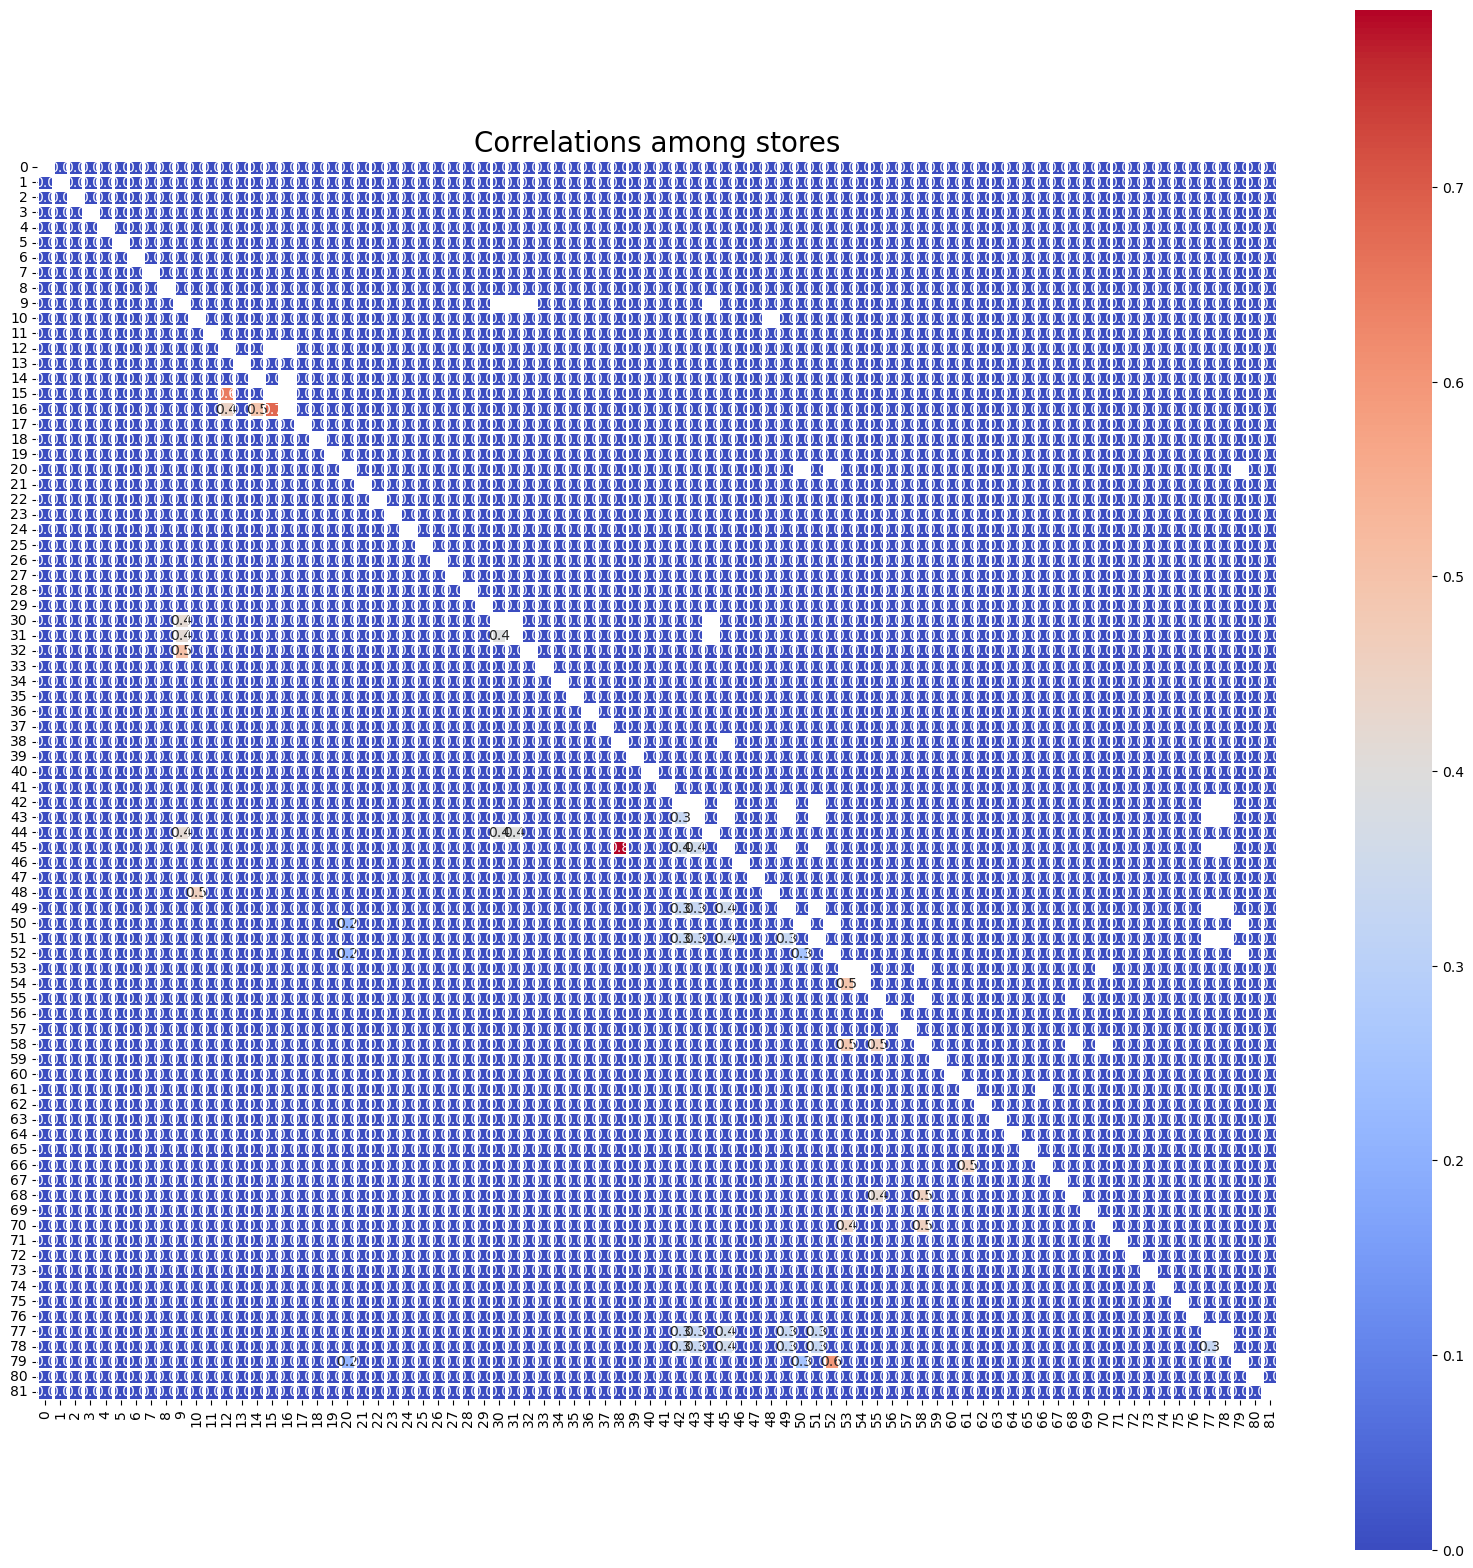

In [65]:
a = df["Variedad"].copy()
a = a.unique()

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(a)
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Upper triangle of an array
cosine_sim_matrix

plt.figure(figsize=(20, 20))

sns.heatmap(cosine_sim_matrix,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=True)

plt.title("Similarity",fontsize = 20)
plt.show()

In [64]:
varieties = df['Variedad'].unique()
varieties[45], varieties[38]

('Thompson Seedless', 'Thompson')

In [66]:
varieties[79], varieties[52]

('Bartlett de invierno', 'Bartlett de verano')

In [68]:
varieties[15], varieties[16]

('Navel', 'Navel Late')

In [67]:
varieties[53], varieties[54]

('Moscatel Rosada', 'Rosada Pastilla')

In [73]:
df['Volumen'].min(), df['Volumen'].max()

(0.0, 688000.0)

In [74]:
df['Precio'].min(),df['Precio'].max()

(0.0, 725000.0)

In [77]:
df[df['Precio']>720000]

,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Total
160680,Granny Smith,Mercado Mayorista Lo Valledor de Santiago,Bin (400 kilos),Jueves,725000.0,2023-01-26,38.0,Manzana,27550000.0


In [78]:
df[df['Volumen']>680000]

,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Total
82767,Sin especificar,Mercado Mayorista Lo Valledor de Santiago,Paquete 20 unidades (volumen en unidades),Miércoles,2105.0,2021-02-10,688000.0,Cebolla,1.448240e+09


In [70]:
df.to_csv('./exported_data_2018-09-24_to_2023-07-14_V1.1.csv')